<a href="https://colab.research.google.com/github/GauriNighot76/VOIS_AICTE_Oct2025_GauriNighot/blob/main/AIRBNB_HOTEL_BOOKING_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [5]:
file_path = "/content/1730285881-Airbnb_Open_Data.xlsx"
df = pd.read_excel(file_path)

In [6]:
print("Data Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Data Shape: (102599, 26)

Columns:
 Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   

In [7]:
df = df.drop_duplicates()
df = df.dropna(subset=["price", "country", "neighbourhood group"])

In [8]:
print("\nPrice Statistics:\n", df["price"].describe())


Price Statistics:
 count    101257.000000
mean        625.440236
std         331.777271
min          50.000000
25%         340.000000
50%         624.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64


In [9]:
plt.show()
print("\nPrice Statistics:\n", df["price"].describe())



Price Statistics:
 count    101257.000000
mean        625.440236
std         331.777271
min          50.000000
25%         340.000000
50%         624.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64


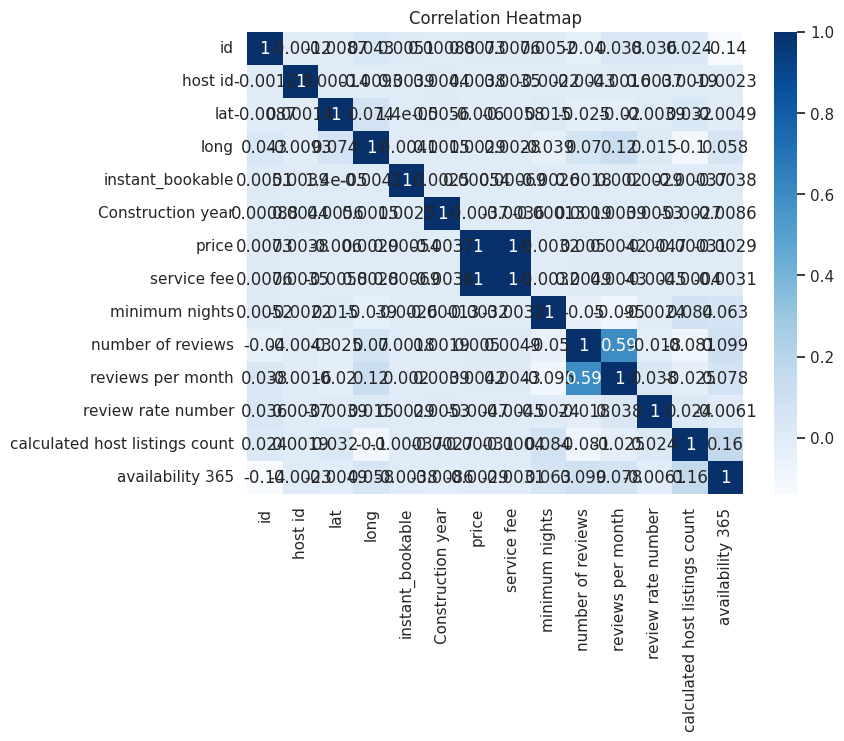

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


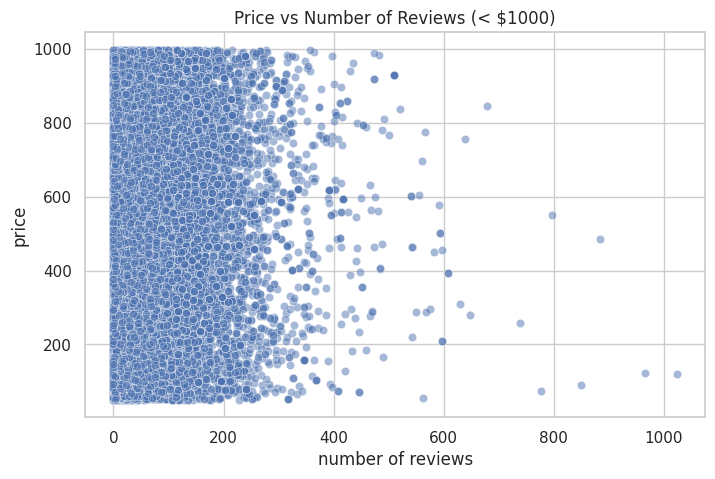

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="number of reviews", y="price", data=df[df['price'] < 1000], alpha=0.5)
plt.title("Price vs Number of Reviews (< $1000)")
plt.show()

In [12]:
df_neigh = df.groupby("neighbourhood")["price"].mean().reset_index().sort_values(by="price", ascending=False).head(20)
fig = px.bar(df_neigh, x="price", y="neighbourhood", orientation="h", title="Top 20 Neighbourhoods by Avg Price", color="price")
fig.show()

In [13]:
fig = px.box(df[df["price"] < 1000], x="neighbourhood group", y="price", points="all", title="Price Distribution by Neighbourhood Group (< $1000)")
fig.show()

In [14]:
print("\nKey Insights:")
print("1. Some neighbourhood groups have significantly higher average prices.")
print("2. Room type distribution shows which type is most common.")
print("3. Availability trends highlight which groups have more year-round listings.")
print("4. Reviews vs Price shows if higher-priced listings attract more/less reviews.")
print("5. Neighbourhood-level analysis reveals local pricing differences.")


Key Insights:
1. Some neighbourhood groups have significantly higher average prices.
2. Room type distribution shows which type is most common.
3. Availability trends highlight which groups have more year-round listings.
4. Reviews vs Price shows if higher-priced listings attract more/less reviews.
5. Neighbourhood-level analysis reveals local pricing differences.


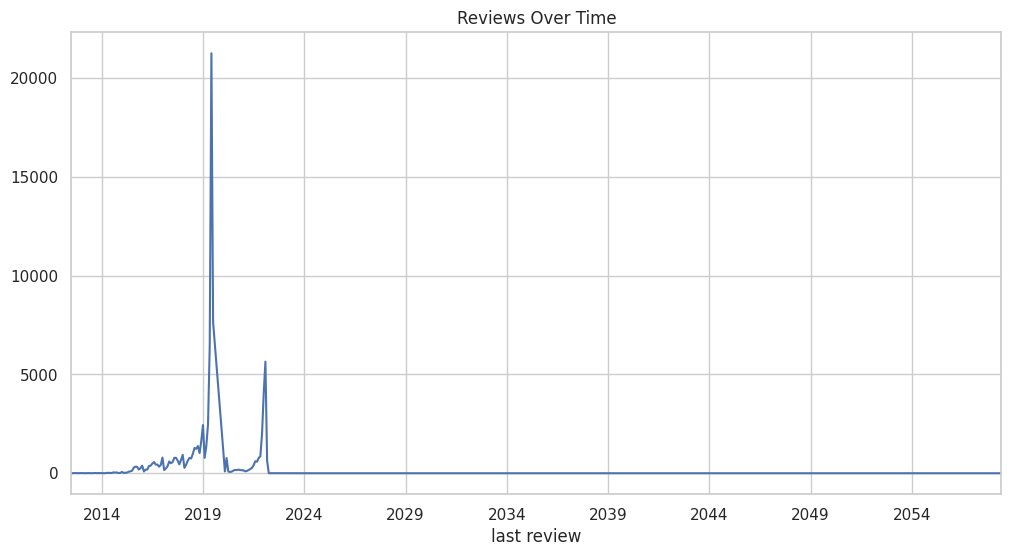

In [15]:
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
reviews_by_month = df.groupby(df['last review'].dt.to_period('M')).size()
reviews_by_month.plot(kind='line', figsize=(12,6), title='Reviews Over Time')
plt.show()


In [16]:
df["number of reviews"] = df["number of reviews"].fillna(0)


In [17]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="long",
    color="price",
    size="number of reviews",
    hover_name="neighbourhood",
    mapbox_style="carto-positron",
    zoom=10,
    title="Airbnb Listings by Location and Price"
)

fig.show()


/tmp/ipython-input-3889963538.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




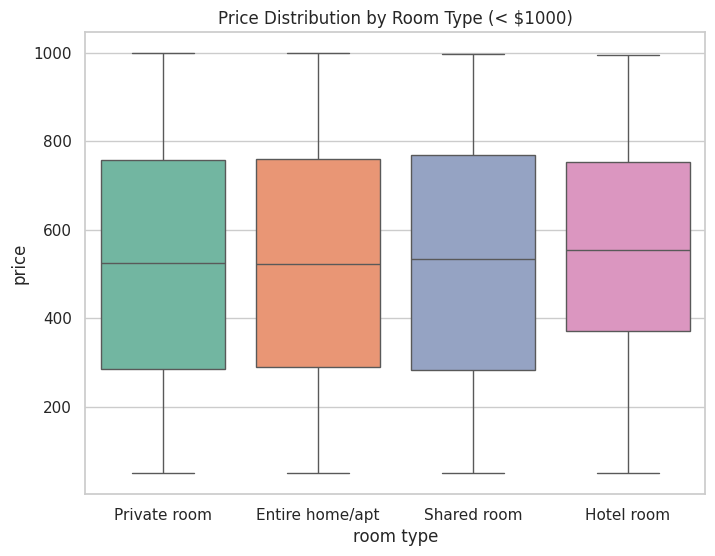

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x="room type", y="price", data=df[df["price"] < 1000], palette="Set2")
plt.title("Price Distribution by Room Type (< $1000)")
plt.show()


/tmp/ipython-input-1664564593.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




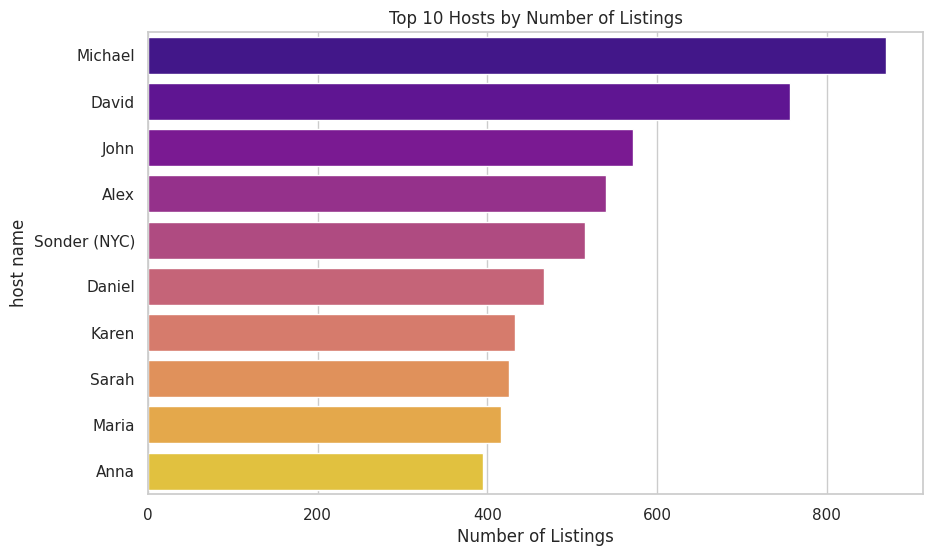

In [19]:
top_hosts = df["host name"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_hosts.values, y=top_hosts.index, palette="plasma")
plt.title("Top 10 Hosts by Number of Listings")
plt.xlabel("Number of Listings")
plt.show()


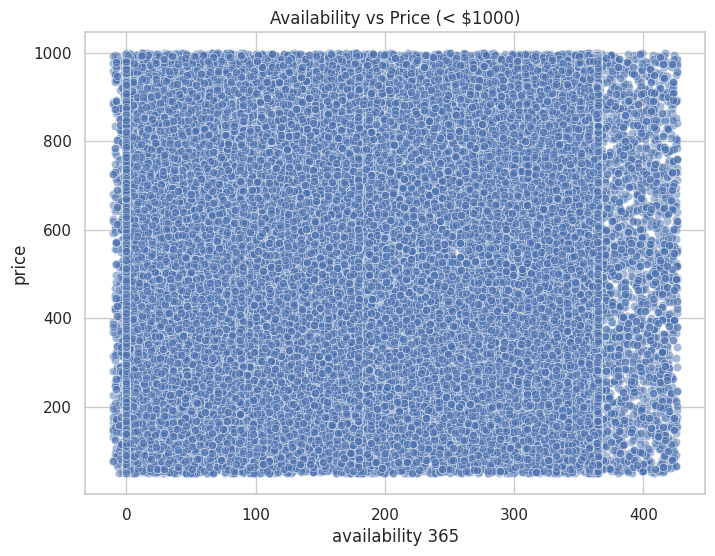

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="availability 365", y="price", data=df[df["price"] < 1000], alpha=0.5)
plt.title("Availability vs Price (< $1000)")
plt.show()


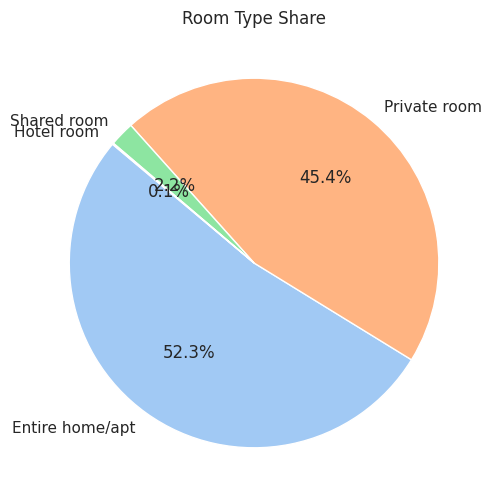

In [21]:
room_counts = df["room type"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Room Type Share")
plt.show()


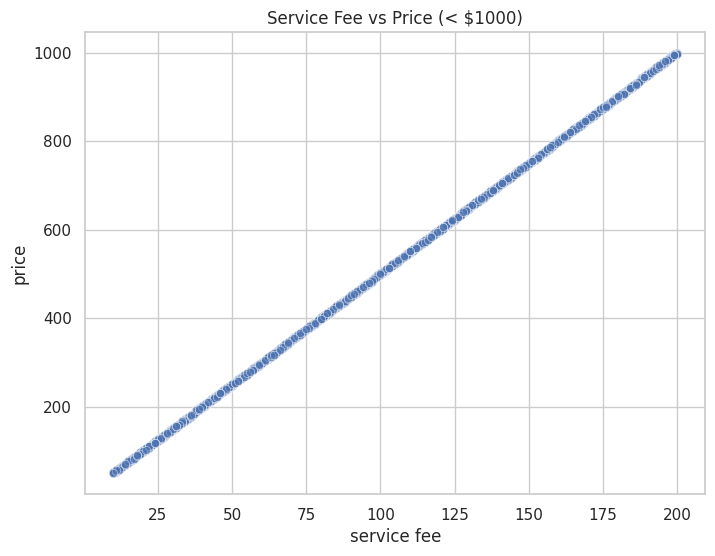

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="service fee", y="price", data=df[df["price"] < 1000], alpha=0.6)
plt.title("Service Fee vs Price (< $1000)")
plt.show()
